In [1]:
import pandas as pd

In [2]:
full_data = pd.read_csv('laliga_2014_2026.csv')

In [3]:
print(full_data.shape)
full_data.head()

(240, 12)


,pos,team,pld,w,d,l,gf,ga,gd,pts,qualification_or_relegation,season
0,1,Barcelona,38,30,4,4,110,21,+89,94,Qualification for the Champions League group s...,2014-15
1,2,Real Madrid,38,30,2,6,118,38,+80,92,Qualification for the Champions League group s...,2014-15
2,3,Atlético Madrid,38,23,9,6,67,29,+38,78,Qualification for the Champions League group s...,2014-15
3,4,Valencia,38,22,11,5,70,32,+38,77,Qualification for the Champions League play-of...,2014-15
4,5,Sevilla,38,23,7,8,71,45,+26,76,Qualification for the Champions League group s...,2014-15


# Data Exploration

In [4]:
# number of appearences of the team for the past 12 seasons
# if appearence is below 12 then the team was relegated at some point

full_data['team'].value_counts()

team
Barcelona              12
Real Madrid            12
Atlético Madrid        12
Valencia               12
Sevilla                12
Villarreal             12
Athletic Bilbao        12
Celta Vigo             12
Real Sociedad          12
Getafe                 11
Real Betis             11
Espanyol               10
Alavés                  9
Osasuna                 8
Levante                 8
Rayo Vallecano          8
Eibar                   7
Granada                 7
Mallorca                6
Girona                  6
Valladolid              5
Leganés                 5
Elche                   5
Las Palmas              5
Deportivo La Coruña     4
Málaga                  4
Cádiz                   4
Almería                 3
Huesca                  2
Sporting Gijón          2
Córdoba                 1
Oviedo                  1
Name: count, dtype: int64

In [5]:
# Top 3 ranking counts per team

full_data['team'].groupby(full_data['pos']).value_counts().head(10)

pos  team           
1    Barcelona          7
     Real Madrid        4
     Atlético Madrid    1
2    Real Madrid        6
     Barcelona          4
     Atlético Madrid    2
3    Atlético Madrid    8
     Real Madrid        2
     Barcelona          1
     Girona             1
Name: count, dtype: int64

In [6]:
import plotly.express as px

In [7]:
# get the top 3 ranks only
ranking_counts = full_data['team'].groupby(full_data['pos']).value_counts().reset_index(name='counts')

# filter for top 3 positions
ranking_counts = ranking_counts[ranking_counts['pos'].isin([1, 2, 3])]

# create a bar plot
fig = px.bar(ranking_counts, x='team', y='counts', color='pos',
             barmode='group',
             title='Top 3 Rankings per Team in La Liga (2014-2026)',
             labels={'counts': 'Top-3 Finishes', 'team': 'Team', 'pos': 'Final Position'})  

fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show()

In [8]:
full_data.describe()

,pos,pld,w,d,l,gf,ga
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10.500000,36.258333,13.425000,9.408333,13.425000,47.562500,47.562500
std,5.778332,5.790623,6.402356,3.243264,5.712297,18.898436,14.844108
min,1.000000,16.000000,2.000000,1.000000,1.000000,7.000000,15.000000
25%,5.750000,38.000000,9.000000,7.000000,9.000000,36.000000,38.000000
50%,10.500000,38.000000,12.000000,9.500000,14.000000,44.500000,49.000000
75%,15.250000,38.000000,17.000000,11.250000,17.250000,55.250000,57.000000
max,20.000000,38.000000,30.000000,18.000000,30.000000,118.000000,94.000000


In [9]:
# Add a column for points per match played
# Ensure 'pts' and 'pld' columns are numeric
full_data['pts'] = pd.to_numeric(full_data['pts'], errors='coerce')
full_data['pld'] = pd.to_numeric(full_data['pld'], errors='coerce')
full_data['pts_per_match'] = (full_data['pts'] / full_data['pld']).round(2)

# Display the updated dataframe
full_data.head()

,pos,team,pld,w,d,l,gf,ga,gd,pts,qualification_or_relegation,season,pts_per_match
0,1,Barcelona,38,30,4,4,110,21,+89,94.0,Qualification for the Champions League group s...,2014-15,2.47
1,2,Real Madrid,38,30,2,6,118,38,+80,92.0,Qualification for the Champions League group s...,2014-15,2.42
2,3,Atlético Madrid,38,23,9,6,67,29,+38,78.0,Qualification for the Champions League group s...,2014-15,2.05
3,4,Valencia,38,22,11,5,70,32,+38,77.0,Qualification for the Champions League play-of...,2014-15,2.03
4,5,Sevilla,38,23,7,8,71,45,+26,76.0,Qualification for the Champions League group s...,2014-15,2.00


In [10]:
# winning teamas from the past 11 years

#filtering the datasets for the teams that finished 1st each season

Winning_teams = full_data[full_data["pos"]== 1][["season", "team", "pts", "gd", "pts_per_match"]].sort_values("season") 

print(Winning_teams)


      season             team   pts   gd  pts_per_match
0    2014-15        Barcelona  94.0  +89           2.47
20   2015-16        Barcelona  91.0  +83           2.39
40   2016-17      Real Madrid  93.0  +65           2.45
60   2017-18        Barcelona  93.0  +70           2.45
80   2018-19        Barcelona  87.0  +54           2.29
100  2019-20      Real Madrid  87.0  +45           2.29
120  2020-21  Atlético Madrid  86.0  +42           2.26
140  2021-22      Real Madrid  86.0  +49           2.26
160  2022-23        Barcelona  88.0  +50           2.32
180  2023-24      Real Madrid  95.0  +61           2.50
200  2024-25        Barcelona  88.0  +63           2.32
220  2025-26        Barcelona  46.0  +31           2.56


In [11]:
full_data.head(1)

,pos,team,pld,w,d,l,gf,ga,gd,pts,qualification_or_relegation,season,pts_per_match
0,1,Barcelona,38,30,4,4,110,21,+89,94.0,Qualification for the Champions League group s...,2014-15,2.47


In [12]:
# filtering wiining teams from past 11 seasons i.e excluding current season
Winning_teams_past_11 = full_data[(full_data["pos"]== 1) & (full_data["season"] != '2025-2026')][["season", "team", "pts", "gd", "pts_per_match"]].sort_values("season")

# computing the average points per match for the winning teams over the past 11 seasons
average_pts_per_match = Winning_teams_past_11['pts_per_match'].mean().round(2)

# displaying the result
print(f"The average points per match for the winning teams over the past 11 seasons is: {average_pts_per_match}")



The average points per match for the winning teams over the past 11 seasons is: 2.38


In [13]:
# add new column with binary indicator(1 if team won the legue and 0 otherwise)
full_data['is_champion'] = (full_data['pos'] == 1).astype(int)

full_data.head(5)

,pos,team,pld,w,d,l,gf,ga,gd,pts,qualification_or_relegation,season,pts_per_match,is_champion
0,1,Barcelona,38,30,4,4,110,21,+89,94.0,Qualification for the Champions League group s...,2014-15,2.47,1
1,2,Real Madrid,38,30,2,6,118,38,+80,92.0,Qualification for the Champions League group s...,2014-15,2.42,0
2,3,Atlético Madrid,38,23,9,6,67,29,+38,78.0,Qualification for the Champions League group s...,2014-15,2.05,0
3,4,Valencia,38,22,11,5,70,32,+38,77.0,Qualification for the Champions League play-of...,2014-15,2.03,0
4,5,Sevilla,38,23,7,8,71,45,+26,76.0,Qualification for the Champions League group s...,2014-15,2.00,0


In [14]:
# calculate the mean points per match for champions

mean_pts_per_match_champions = full_data[full_data['is_champion'] == 1]['pts_per_match'].mean().round(2)

print(f"The mean points per match for champions is: {mean_pts_per_match_champions}")


The mean points per match for champions is: 2.38


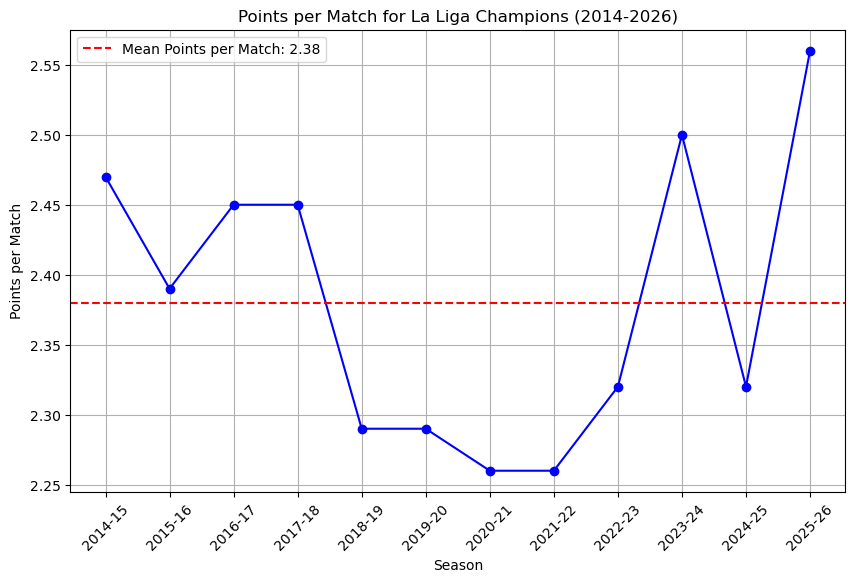

In [15]:
import matplotlib.pyplot as plt

#visualizing points per match for champions over the seasons
champions_data = full_data[full_data['is_champion'] == 1]
plt.figure(figsize=(10, 6))
plt.plot(champions_data['season'], champions_data['pts_per_match'], marker='o', linestyle='-', color='b')
plt.axhline(y=mean_pts_per_match_champions, color='r', linestyle='--', label=f'Mean Points per Match: {mean_pts_per_match_champions}')
plt.title('Points per Match for La Liga Champions (2014-2026)')
plt.xlabel('Season')
plt.ylabel('Points per Match')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

## Machine Learning Model and Predictions

In [16]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, log_loss
from sklearn.model_selection import cross_val_score


In [17]:
# calculate how many games each team has left to play in the current season
full_data['games_left'] = 38 - full_data['pld']

# estimate the final number of points if the team maintains their current points per match rate
full_data['estimated_final_pts'] = full_data["pts"] + full_data["games_left"] * full_data["pts_per_match"]



In [21]:
full_data.tail(5)

,pos,team,pld,w,d,l,gf,ga,gd,pts,qualification_or_relegation,season,pts_per_match,is_champion,games_left,estimated_final_pts
235,16,Real Sociedad,17,4,5,8,21,25,−4,17.0,NaN,2025-26,1.00,0,21,38.00
236,17,Valencia,17,3,7,7,16,26,−10,16.0,NaN,2025-26,0.94,0,21,35.74
237,18,Girona,17,3,6,8,15,33,−18,15.0,Relegation to Segunda División,2025-26,0.88,0,21,33.48
238,19,Oviedo,17,2,5,10,7,26,−19,11.0,Relegation to Segunda División,2025-26,0.65,0,21,24.65
239,20,Levante,16,2,4,10,17,29,−12,10.0,Relegation to Segunda División,2025-26,0.62,0,22,23.64


In [37]:
# trainnig the model 

#selecting features the model will be using
features = ['pts_per_match', 'gd', 'pld', 'w', 'l', 'estimated_final_pts']

# Ensure all feature columns are numeric and handle non-standard minus signs
for col in ['pts_per_match', 'gd', 'pld', 'w', 'l', 'estimated_final_pts']:
    full_data[col] = pd.to_numeric(full_data[col].astype(str).str.replace('−', '-', regex=False), errors='coerce')

#creating training datasets
df_train = full_data[full_data['season'] != '2025-26']

#creating testing dataset
df_test = full_data[full_data['season'] == '2025-26'].copy()

#definning X and y for training
X_train = df_train[features]
y_train = df_train['is_champion']
X_test = df_test[features]

In [38]:
# initializing the RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, random_state=42)

# training the model on the training data
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [39]:
# predicting on the test data with binary outcome
train_preds = model.predict(X_train)

#predicting probabilities of being champion
train_probs = model.predict_proba(X_train)[:, 1]

In [30]:
# calculating the accuracy on the training data
accuracy = accuracy_score(y_train, train_preds)

# calculating ROC AUC score
roc_auc = roc_auc_score(y_train, train_probs)

# computing log loss
logloss = log_loss(y_train, train_probs)

#displaying the performance metrics
print(f"\n Model Performance on Historical Data:")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Log Loss: {logloss:.4f}")

# print detailed classification report
print("\nClassification Report:")
print(classification_report(y_train, train_preds))

# display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train, train_preds))



 Model Performance on Historical Data:
Accuracy: 1.0000
ROC AUC Score: 1.0000
Log Loss: 0.0134

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       228
           1       1.00      1.00      1.00        12

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240

Confusion Matrix:
[[228   0]
 [  0  12]]
